In [1]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

In [2]:
e_disk = np.genfromtxt("orbits_disk_e.csv", delimiter=",", dtype="float")
t = e_disk[:,101]
e_disk = np.delete(e_disk, [0,100], axis=1)
e_disk = np.delete(e_disk, [0,99], axis=1)
#######################################################################################
a_disk = np.genfromtxt("orbits_disk_a.csv", delimiter=",", dtype="float")
a_disk = np.delete(a_disk, [0,100], axis=1)
a_disk = np.delete(a_disk, [0,99], axis=1)
#######################################################################################
inc_disk = np.genfromtxt("orbits_disk_inc.csv", delimiter=",", dtype="float")
inc_disk = np.delete(inc_disk, [0,100], axis=1)
inc_disk = np.delete(inc_disk, [0,99], axis=1)
######################################################################################
omega_disk = np.genfromtxt("orbits_disk_omega.csv", delimiter=",", dtype="float")
omega_disk = np.delete(omega_disk, [0,100], axis=1)
omega_disk = np.delete(omega_disk, [0,99], axis=1)
######################################################################################
Omega_disk = np.genfromtxt("orbits_disk_Omega1.csv", delimiter=",", dtype="float")
Omega_disk = np.delete(Omega_disk, [0,100], axis=1)
Omega_disk = np.delete(Omega_disk, [0,99], axis=1)
######################################################################################
M_disk = np.genfromtxt("orbits_disk_M.csv", delimiter=",", dtype="float")
M_disk = np.delete(M_disk, [0,100], axis=1)
M_disk = np.delete(M_disk, [0,99], axis=1)

In [3]:
def Distance(e,a,i,omega,Omega,nu,MASS_BH,MASS_STAR):
    for n in range(len(e)):
        if e[n] > 1:
            e[n] = 1
    p = (a * (1 - (e * e)))
    r = p / (1 + (e * np.cos(nu)))
    ############################################################################
    cO = np.cos(Omega)
    sO = np.sin(Omega)
    ci = np.cos(i)
    si = np.sin(i)
    co = np.cos(omega + nu)
    so = np.sin(omega + nu)
    sn = np.sin(nu)
    ############################################################################
    x = r * ((cO * co) - (sO * so * ci))
    y = r * ((sO * co) + (cO * so * ci))
    z = r * (si * so)
    ############################################################################
    R = np.sqrt(x**2 + y**2 + z**2)
    R_Mean = np.mean(R)
    R_STD = np.std(R)
    return R_Mean, R_STD

In [4]:
R = np.array([])
R_S = np.array([])
for n in range(len(t)):
    R_Mean, R_STD = Distance(e_disk[n],a_disk[n],inc_disk[n],omega_disk[n],Omega_disk[n],M_disk[n],1,1e-4)
    R = np.append(R,R_Mean)
    R_S = np.append(R_S,R_STD)

(0.0, 3642.4000000000001)

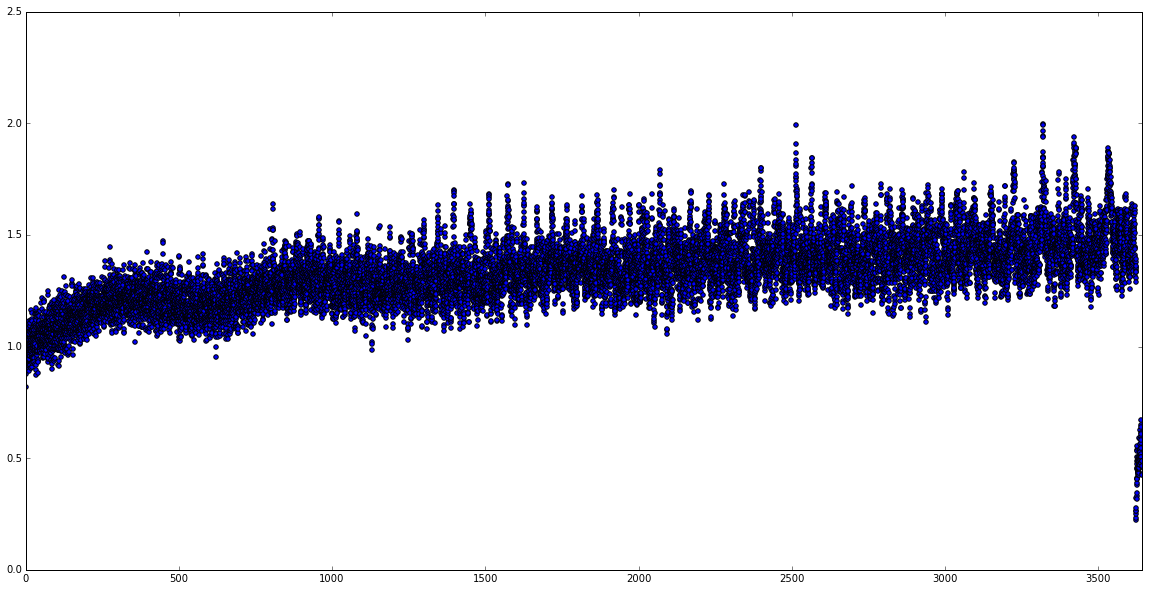

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(t,R)
plt.xlim(min(t),max(t))